In [1]:
import torch
import matplotlib.pyplot as plt

Green's function for one-dimensional free-space Helmholtz equation :  
- $G(x,\xi) = \frac{i}{2k_0} e^{i k_0 r} $, where $r = |x - \xi|$

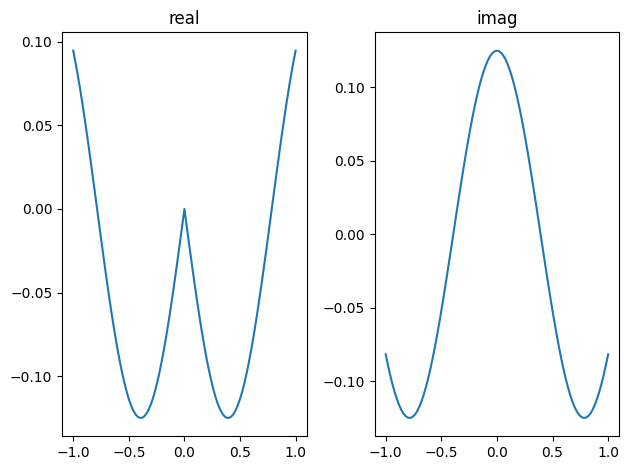

In [73]:
def func(X):
    x = X[:,[0]]
    ksi = X[:,[1]]
    r = (x - ksi).abs()
    return 1j / (2*k) * torch.exp(1j * k * r)

k = 4
n = 101
X = torch.concat([
    torch.zeros(n,1), torch.linspace(-1,1,n).reshape(-1,1)], axis=1)
y = func(X)

plt.subplot(121)
plt.plot(X[:,1], y.real)
plt.title('real')
plt.subplot(122)
plt.plot(X[:,1], y.imag)
plt.title('imag')
plt.tight_layout()

Green's function for two-dimensional free-space Helmholtz equation :  
- $G(x, y, \xi, \eta) = \frac{i}{4} H^{(1)}_0(k_0 r) $, where $r = \sqrt{(x-\xi)^2 + (y-\eta)^2}$

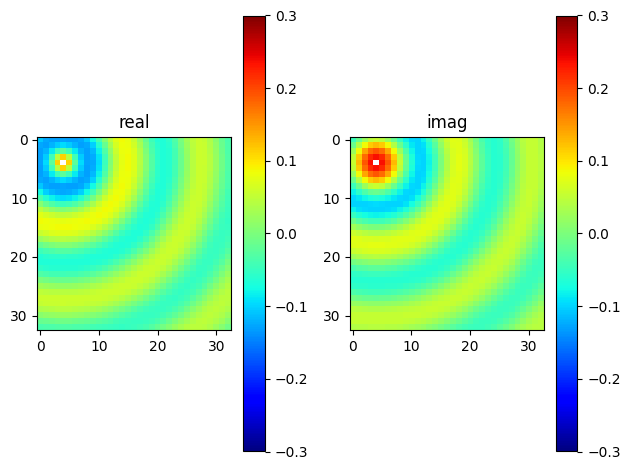

In [68]:
from scipy.special import hankel1

k = 8
n = 33
x = torch.linspace(-1,1,n)
y = torch.linspace(-1,1,n)
X, Y = torch.meshgrid(x,y)

ksi = torch.linspace(-1,1,n)
eta = torch.linspace(-1,1,n)
Ksi, Eta = torch.meshgrid(ksi, eta)

XY = torch.concat([X.reshape(-1,1), Y.reshape(-1,1)], axis=1)
KE = torch.concat([Ksi.reshape(-1,1), Eta.reshape(-1,1)], axis=1)

idx = torch.arange(XY.shape[0])
idx = torch.cartesian_prod(idx, idx)

r = ((XY[idx[:,0]] - KE[idx[:,1]])**2).sum(axis=1)**0.5
G = hankel1(0, k*r) * 1j / 4
G = G.reshape(n, n, n, n)

plt.subplot(121)
plt.imshow(G[4,4].real, vmin=-.3, vmax=.3, cmap='jet')
plt.title('real')
plt.colorbar()
plt.subplot(122)
plt.imshow(G[4,4].imag, vmin=-.3, vmax=.3, cmap='jet')
plt.title('imag')
plt.colorbar()
plt.tight_layout()

Green's function for three-dimensional free-space Helmholtz equation :  
- $G(x, y, z,  \xi, \eta, \zeta) = \frac{1}{4r} e^{i k_0 r}$, where $r = \sqrt{(x-\xi)^2 + (y-\eta)^2 + (z-\zeta)^2}$

In [6]:
import sys 
sys.path.append('../')
from dataset import helmholtz_green_1d

In [7]:
data = helmholtz_green_1d()

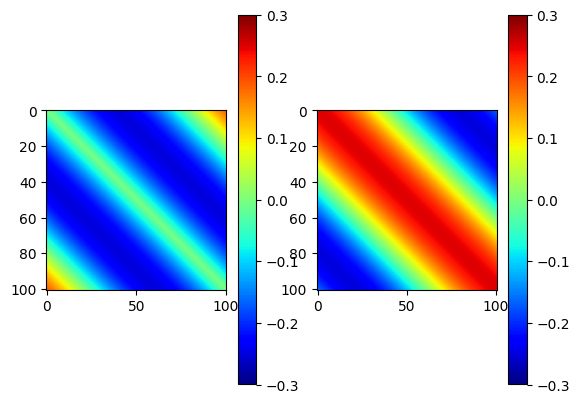

In [8]:
xTest = data['xTest'].reshape(101,101,2)
yTest_real = data['yTest_real'].reshape(101,101)
yTest_img = data['yTest_img'].reshape(101,101)

plt.subplot(121)
plt.imshow(yTest_real, vmin=-.3, vmax=.3, cmap='jet')
plt.colorbar()
plt.subplot(122)
plt.imshow(yTest_img, vmin=-.3, vmax=.3, cmap='jet')
plt.colorbar()